In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

2025-03-02 10:33:26.654025: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-02 10:33:27.118000: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-02 10:33:27.421565: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740911607.734485    7643 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740911607.851469    7643 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-02 10:33:28.755812: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [3]:
(X_train , y_train),(X_test,y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
# reshaping y into 1d array
y_train = y_train.reshape(-1,)
y_train[:5]
y_test = y_test.reshape(-1,)

In [6]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [7]:
def plot_samples(X,y,index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

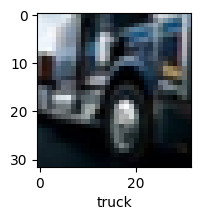

In [8]:
plot_samples(X_train,y_train,12312)

# NORMALISATION

In [9]:
X_train = X_train/255.
X_test = X_test/255.

# using CNN for improving the model

In [13]:
cnn = tf.keras.Sequential([
    #convolution layer
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3),activation = "relu",input_shape = (32,32,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3),activation= "relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    #dense layer
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation = "relu"),
    tf.keras.layers.Dense(10,activation = "softmax")
])

# compiling
cnn.compile(optimizer = "Adam",
           loss = "sparse_categorical_crossentropy",
           metrics=["accuracy"])

cnn.fit(X_train,y_train,epochs = 2)

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 21ms/step - accuracy: 0.3916 - loss: 1.6660
Epoch 2/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.6090 - loss: 1.1215


In [14]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6292 - loss: 1.0657


[1.0724682807922363, 0.6276000142097473]

# comparing and plotting results

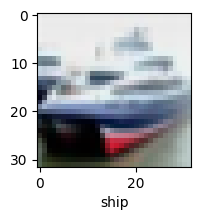

In [15]:
plot_samples(X_test,y_test,1)

In [17]:
y_pred = cnn.predict(X_test)

# working on the probability score
y_classes = [np.argmax(element) for element in y_pred]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


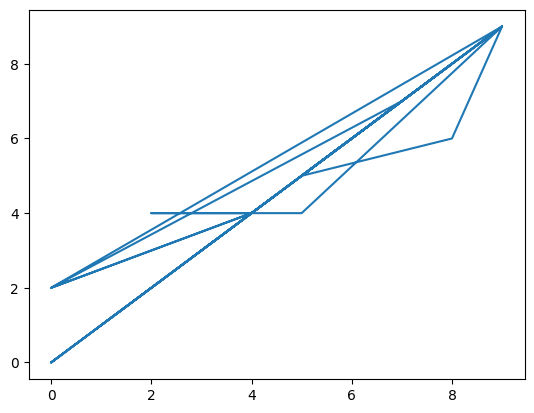

In [ ]:
plt.plot(y_test[:30],y_classes[:30])

In [18]:
# function to compare true vs predicted results
def comparison(X,y,index):
    # plt.figure(figsize = (15,2))
    plt.subplot(1,2,1)
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
    
    plt.subplot(1,2,2)
    plt.imshow(X[index])
    plt.xlabel(classes[y_classes[index]])
    
    

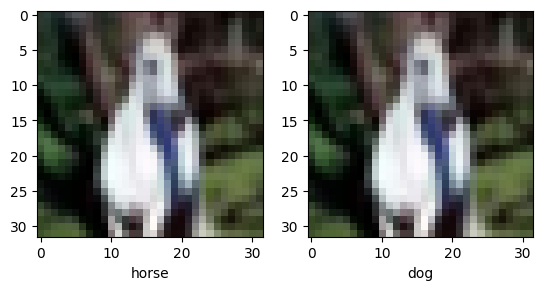

In [19]:
# case where model is failing to classify correctly
comparison(X_test,y_test,1040)

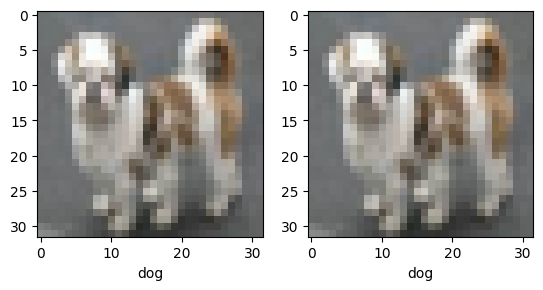

In [20]:
# case where model is classifying correctly
comparison(X_test,y_test,1041)

In [21]:
cnn.save("model/cnn_model.h5")
